Імпортуємо потрібну бібліотеку.

In [18]:
import pandas as pd 

Зчитаємо датасет.

In [19]:
def getDataset(path):
    return pd.read_csv(path, sep=',',encoding='cp1252')

dataset = getDataset('FullDataset.csv')

dataset = dataset[dataset["ID"]<50000]
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 0 to 50072
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50073 non-null  int64  
 1   ID          50073 non-null  int64  
 2   Sex         50073 non-null  object 
 3   Age         50073 non-null  int64  
 4   Height      50073 non-null  int64  
 5   Weight      50073 non-null  int64  
 6   Team        50073 non-null  object 
 7   Year        50073 non-null  int64  
 8   Season      50073 non-null  object 
 9   Sport       50073 non-null  object 
 10  Medal       6658 non-null   object 
 11  Code        50073 non-null  object 
 12  GDP         50073 non-null  float64
 13  Population  50073 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.7+ MB


,Unnamed: 0,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal,Code,GDP,Population
0,0,1,M,24,180,80,China,1992,Summer,Basketball,NaN,CHN,4.269157e+11,1.164970e+09
1,1,2,M,23,170,60,China,2012,Summer,Judo,NaN,CHN,8.532230e+12,1.350695e+09
2,2,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
3,3,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
4,4,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07
5,5,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07
6,6,5,F,27,185,82,Netherlands,1994,Winter,Speed Skating,NaN,NLD,3.791303e+11,1.538284e+07
7,7,5,F,27,185,82,Netherlands,1994,Winter,Speed Skating,NaN,NLD,3.791303e+11,1.538284e+07
8,8,6,M,31,188,75,United States,1992,Winter,Cross Country Skiing,NaN,USA,6.520327e+12,2.565140e+08
9,9,6,M,31,188,75,United States,1992,Winter,Cross Country Skiing,NaN,USA,6.520327e+12,2.565140e+08


Згрупуємо види спорту.

In [20]:
def isMatch(str,lst):
    for l in lst:
        if(l == str):
            return 1
    return 0
lst1 = ["Cross Country Skiing", "Sailing", "Athletics", "Alpine Skiing", "Luge", "Rowing", "Swimming", "Canoeing", "Cycling", "Freestyle Skiing"]
lst2 = ["Speed Skating", "Weightlifting", "Bobsleigh", "Archery", "Shooting", "Trampolining", "Snowboarding", "Ski Jumping", "Short Track Speed Skating", "Skeleton"]
lst3 = ["Gymnastics", "Diving", "Figure Skating", "Synchronized Swimming", "Rhythmic Gymnastics", "Curling", "Golf"]
lst4 = ["Judo", "Wrestling", "Taekwondo", "Boxing", "Fencing"]
lst5 = ["Biathlon", "Modern Pentathlon", "Nordic Combined", "Triathlon"]
lst6 = ["Basketball","Ice Hockey", "Badminton", "Football", "Equestrianism", "Handball", "Water Polo", "Tennis", "Hockey", "Softball", "Volleyball", "Table Tennis", "Baseball", "Rugby Sevens", "Beach Volleyball"]

for i in range(len(dataset)) :
    if(isMatch(dataset.iloc[i]["Sport"], lst1) == 1):
        dataset.at[i,"Sport"] = 'Cyclic'
    elif(isMatch(dataset.iloc[i]["Sport"], lst2) == 1):
        dataset.at[i,"Sport"] = 'Speed'
    elif(isMatch(dataset.iloc[i]["Sport"], lst3) == 1):
        dataset.at[i,"Sport"] = 'Coordination'
    elif(isMatch(dataset.iloc[i]["Sport"], lst4) == 1):
        dataset.at[i,"Sport"] = 'Fight'
    elif(isMatch(dataset.iloc[i]["Sport"], lst5) == 1):
        dataset.at[i,"Sport"] = 'All-around'
    else:
        dataset.at[i,"Sport"] = 'Games'

Приберемо непотрібні для нашого аналізу стовпчики.

In [21]:
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset = dataset.drop("Code", axis = 1)
dataset = dataset.drop("Year", axis = 1)
dataset = dataset.drop("Team", axis = 1)
dataset = dataset.drop("ID", axis = 1)

dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 0 to 50072
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         50073 non-null  object 
 1   Age         50073 non-null  int64  
 2   Height      50073 non-null  int64  
 3   Weight      50073 non-null  int64  
 4   Season      50073 non-null  object 
 5   Sport       50073 non-null  object 
 6   Medal       6658 non-null   object 
 7   GDP         50073 non-null  float64
 8   Population  50073 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.8+ MB


,Sex,Age,Height,Weight,Season,Sport,Medal,GDP,Population
0,M,24,180,80,Summer,Games,NaN,4.269157e+11,1.164970e+09
1,M,23,170,60,Summer,Fight,NaN,8.532230e+12,1.350695e+09
2,F,21,185,82,Winter,Speed,NaN,2.619105e+11,1.476009e+07
3,F,21,185,82,Winter,Speed,NaN,2.619105e+11,1.476009e+07
4,F,25,185,82,Winter,Speed,NaN,3.629629e+11,1.518417e+07
5,F,25,185,82,Winter,Speed,NaN,3.629629e+11,1.518417e+07
6,F,27,185,82,Winter,Speed,NaN,3.791303e+11,1.538284e+07
7,F,27,185,82,Winter,Speed,NaN,3.791303e+11,1.538284e+07
8,M,31,188,75,Winter,Cyclic,NaN,6.520327e+12,2.565140e+08
9,M,31,188,75,Winter,Cyclic,NaN,6.520327e+12,2.565140e+08


Змінимо значення поля з медалями як булеве чи здобув спортсмен медаль.

In [22]:
dataset["Medal"].notnull().astype('int')
dataset["Medal"].fillna(0,inplace = True)

dataset["Medal"]=dataset["Medal"].replace(regex=["Gold"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Bronze"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Silver"],value='1')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 0 to 50072
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         50073 non-null  object 
 1   Age         50073 non-null  int64  
 2   Height      50073 non-null  int64  
 3   Weight      50073 non-null  int64  
 4   Season      50073 non-null  object 
 5   Sport       50073 non-null  object 
 6   Medal       50073 non-null  object 
 7   GDP         50073 non-null  float64
 8   Population  50073 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.8+ MB


Візуалізуємо співвідношення кількості не отриманих до отриманих медалей.

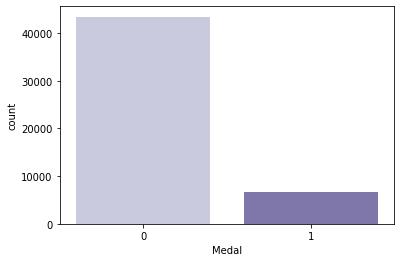

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Medal", data=dataset, palette = "Purples")
plt.show()

Ми готові працювати з даними. Тепер давайте розподілимо дані на тренувальні та дані для тесту, трішки обробимо дані для більш правильного аналізу.

In [24]:
from sklearn.model_selection import train_test_split
trainingData, testingData  = train_test_split(dataset,test_size=0.30,random_state = 1)

features = pd.concat([trainingData,testingData]).reset_index(drop = True)
features = pd.get_dummies(features)
features = features.drop("Medal_0", axis = 1)
features.rename(columns = {'Medal_1':'Medal'}, inplace = True)
trainingData = features.iloc[:trainingData.shape[0],:]
testingData = features.iloc[trainingData.shape[0]:,:]

print(trainingData.head(10))

   Age  Height  Weight           GDP   Population  Sex_F  Sex_M  \
0   34     178      72  6.722015e+10   47451626.0      1      0   
1   24     177      71  1.500323e+11   14692000.0      0      1   
2   30     183     120  6.520327e+12  256514000.0      0      1   
3   22     174      60  3.632805e+10    1989443.0      1      0   
4   25     180      60  8.553147e+09   11541217.0      0      1   
5   28     180      70  3.359986e+11    8268641.0      0      1   
6   26     188      81  3.056540e+10   11126430.0      0      1   
7   30     190      91  5.459824e+11   41733271.0      0      1   
8   17     175      76  1.168269e+09      28175.0      0      1   
9   27     200     128  2.157219e+11    6593386.0      0      1   

   Season_Summer  Season_Winter  Sport_All-around  Sport_Coordination  \
0              1              0                 0                   0   
1              1              0                 0                   0   
2              1              0            

Давайте візуалізуємо матрицю кореляції для x. 

<AxesSubplot:>

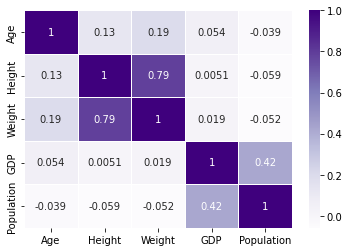

In [25]:
sns.heatmap(dataset.corr(),annot=True,lw=1,cmap = "Purples")

Тепер визначимо змінні X та Y для тренувальних та тестувальних даних.

In [26]:
trainingX  = trainingData.drop(columns='Medal')
trainingY = trainingData['Medal']

testingX  = testingData.drop(columns='Medal')
testingY = testingData['Medal']

Додамо необхідні бібліотеки для побудови моделей, побудуємо їх та перевіримо на тестових даних. Спочатку класифікатор Decision Tree.

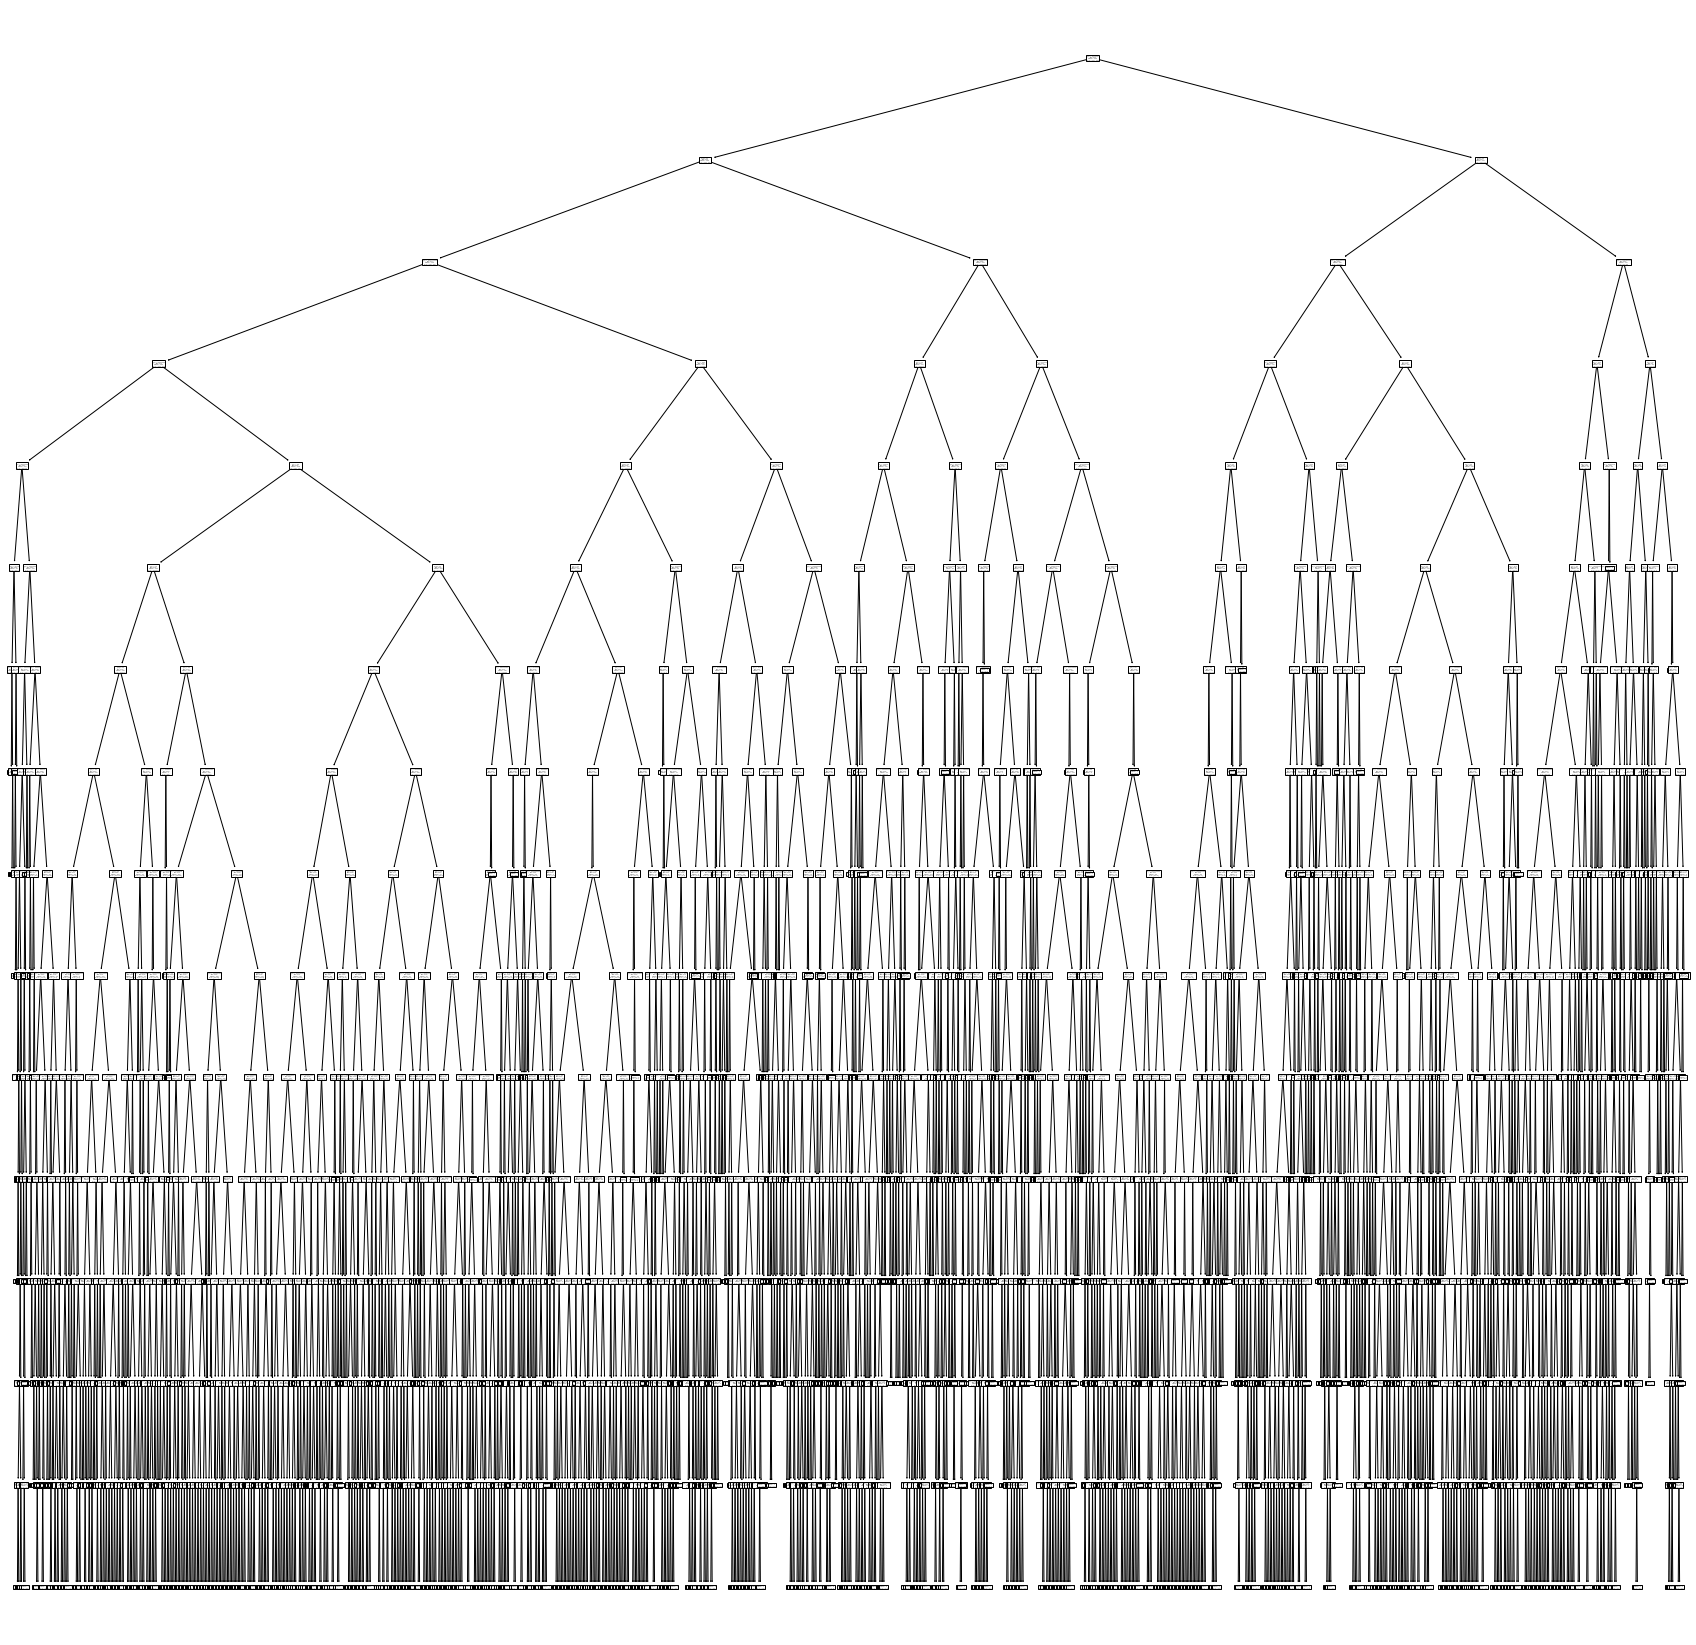

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decisionTree = DecisionTreeClassifier(max_depth=15,random_state=1)
decisionTree.fit(trainingX,trainingY)

plt.figure(figsize=(30,30))  
tree.plot_tree(decisionTree)
plt.show()

arr = decisionTree.predict(testingX)

Виведемо матрицю неточностей для побудованої моделі.

[[12373   671]
 [ 1448   530]]


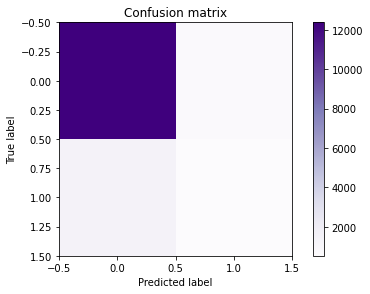

In [28]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,title = "Confusion matrix",cmap = plt.cm.Purples):
    print(cm) 
    plt.figure()
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

cm = confusion_matrix(testingY,arr)
plot_confusion_matrix(cm)

Виведемо оцінку якості моделі для тестових даних.

In [29]:
print('Score of Decision Tree:',decisionTree.score(testingX,testingY)) 

Score of Decision Tree: 0.8589402210091865


Побудуємо ROC криву та значення AUC для нашої моделі.

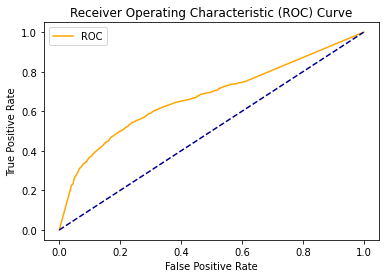

AUC score: 0.6728326797160672


In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = decisionTree.predict_proba(testingX)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(testingY, probs) 

plot_roc_curve(fper, tper)
auc = roc_auc_score(testingY, probs)
print("AUC score:",auc)

Тепер класифікатор Random Forest. 

In [31]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(max_depth=15)
randomForest.fit(trainingX,trainingY)

arr = randomForest.predict(testingX)

Покажемо матрицю неточностей для даної моделі.

[[12903   141]
 [ 1725   253]]


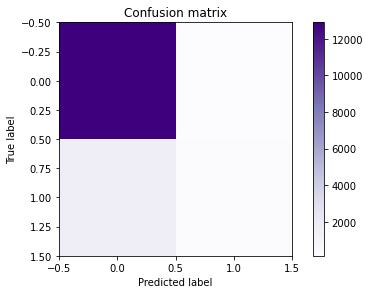

In [32]:
cm = confusion_matrix(testingY,arr)
plot_confusion_matrix(cm)

Виведемо оцінку моделі.

In [33]:
print('Score of Random Forest:',randomForest.score(testingX,testingY)) 

Score of Random Forest: 0.8757821861270138


Побудуємо ROC криву та значення AUC для моделі.

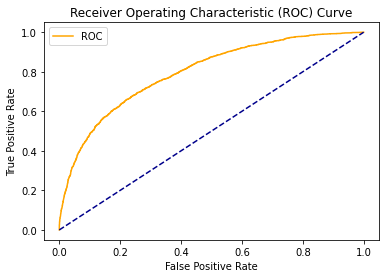

AUC score: 0.7960885052969975


In [34]:
probs = randomForest.predict_proba(testingX)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(testingY, probs) 

plot_roc_curve(fper, tper)
auc = roc_auc_score(testingY, probs)
print("AUC score:",auc)